<a href="https://colab.research.google.com/github/starmath4/Tarea/blob/main/Nov3-4/Clase_4_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
files=glob.glob("/content/drive/MyDrive/ML2023/CATS_DOGS/*")

In [62]:
len(files)

1787

In [63]:
num_px=64 #imagenes de 6x64

In [76]:
train_x=[] #onjuntos de entrenamiento
train_y=[]
for file in files[:100]:
    img=Image.open(file)
    img=img.resize((num_px,num_px)) #Redimensionar imagenes
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y) #transformar los conjuntos de entrenamiento a arreglos
train_x=np.asarray(train_x)

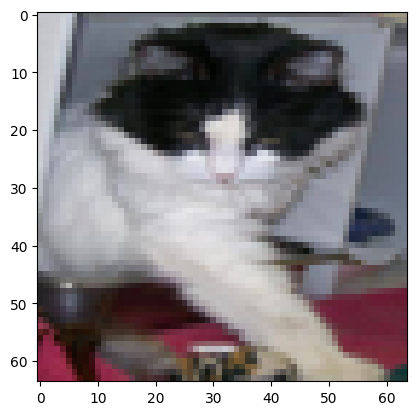

In [77]:
plt.imshow(train_x[0])
#mostrar una imagen

In [66]:
test_x=[] #conjuntos de prueba
test_y=[]
for file in files[1700:]:
    img=Image.open(file)
    img=img.resize((num_px,num_px)) #redimensionar imagen
    data=np.asarray(img) #convertir imagen en arreglo
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y) #transformar los conjuntos de entrenamiento a arreglos
test_x=np.asarray(test_x)

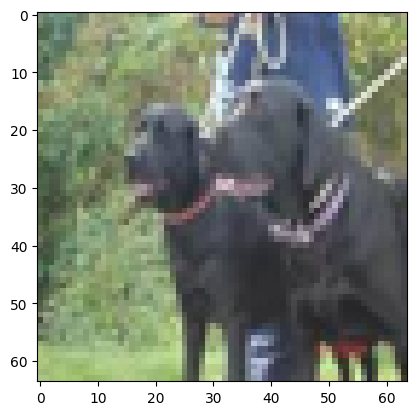

In [78]:
plt.imshow(test_x[0])

In [79]:
#transformación de los arreglos que contienen las imágenes para que sean arreglos unidimensionales

train_x_flatten = train_x.reshape(train_x.shape[0], -1).T
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [100]:
#normalizar las imágenes

train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [101]:
def sigmoide(z):
  return 1/(1+(np.e**(-1*z)))

def derivada_sigmoide(z):
  return (np.e)**z/(1+(np.e**(-1*z)))**2

def round_y(y):
  if y>0.5:
    return 1
  else:
    return 0

def wn(w,b,alpha,x,y):
  a=sigmoide((np.matmul(w.T,train_set_x)+b)) #sigmoide de z
  w=w-alpha*(1/len(x)*x*(a-y))
  b=b-alpha*(1/len(x)*(a-y))
  return w,b

def costo(y_hat,y):
  sum=0
  for i in range (len(y)):
    sum+=y[i]*np.log(y_hat[i])+(1-y[i])*np.log(1-y_hat[i])
  return sum * -1/len(y)

In [124]:
w=np.zeros(np.shape(train_set_x))
b=np.zeros((100,100))

In [127]:
#aplico gradiente descendiente
costo1=0
costo2=0
alpha=0.1 #tasa de aprendizaje

yhat=sigmoide((np.matmul(w.T,train_set_x)+b))

while (abs(costo1-costo2)>0.000000001): #condición para cuando el costo ya no cambie
  #esto debe ser do while
  costo1=costo2 #costo2 tiene el costo de los ultimos parametros usados

  w,b=wn(w,b,alpha,train_set_x,train_set_y) #actualizo los pesos y calculo su costo
  yhat=sigmoide((np.matmul(w.T,train_set_x)+b)) #el argumento de sigmoide corresponde a z
  costo2=costo(yhat,train_set_y)
